In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('foo_data.csv')

In [3]:
data

,Unnamed: 0,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,0,101.644137,0,0,0,0,2837.487471,288654.309953,4077.422743,0.000000,NaN,0.017288,0.001255,0.012165
1,1,1,101.697426,0,0,0,0,2823.102268,289302.053161,4087.128554,25662.357534,0.648180,0.001358,0.001248,0.011926
2,2,2,101.049146,0,14,0,14,2823.102268,287709.618763,4087.128554,0.000000,0.648180,-0.005547,0.000971,0.011776
3,3,3,100.839255,0,0,0,0,2823.102268,287354.307873,4087.128554,0.000000,0.648180,-0.001246,0.000877,0.011553
4,4,4,101.491624,0,0,0,0,2823.483755,289435.062580,4087.128554,0.000000,0.648180,0.007308,0.001133,0.011388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,955,118.809623,0,0,0,0,10445.636082,766236.747613,9607.083184,3590.116683,0.655922,0.015794,0.001602,0.013384
956,956,956,119.514072,3,27,0,18,10434.822458,774423.361247,9608.965102,880.275245,0.669109,0.006767,0.001983,0.012951
957,957,957,120.753406,11,5,0,5,10404.074836,786628.222088,9606.462506,4834.816159,0.675817,0.011212,0.002665,0.012695
958,958,958,121.047261,0,41,0,41,10369.660728,789657.363110,9621.006348,7471.422230,0.673002,0.003269,0.002710,0.012218


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


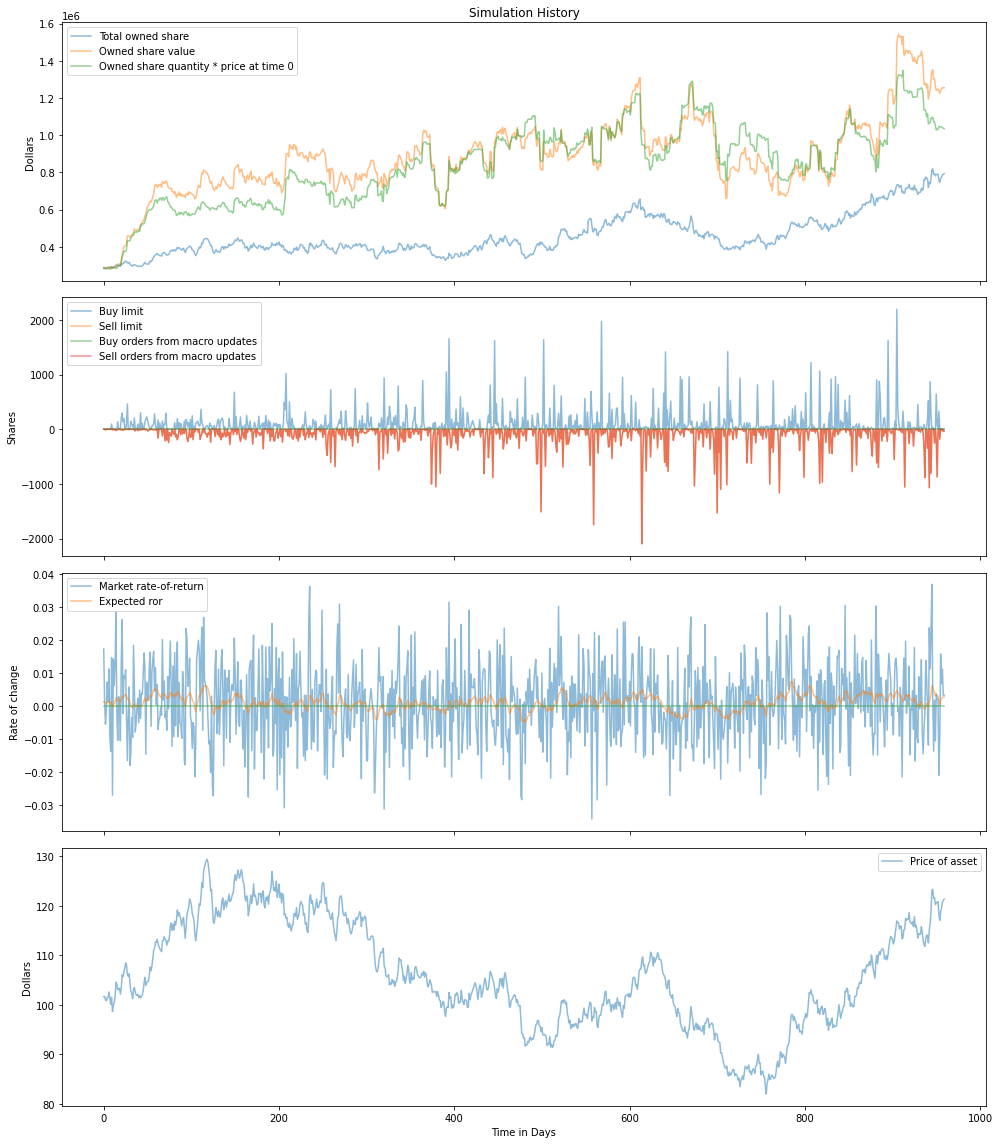

In [4]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run_long.png")
plt.show()